**Nearest Neighbor Algorithm**

In [ ]:
import pandas as pd

Train_X = pd.read_csv('https://raw.githubusercontent.com/rohitk2/CSCI567/main/hw1/training_samples.txt', header=None, sep=" ")
Train_Y = pd.read_csv('https://raw.githubusercontent.com/rohitk2/CSCI567/main/hw1/training_labels.txt', header=None)
Train_Y.columns = ["category"]

Test_X = pd.read_csv('https://raw.githubusercontent.com/rohitk2/CSCI567/main/hw1/testing_samples.txt', header=None, sep=" ")
Test_X.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.568795,6.426093,-2.463448,7.883096,-2.552608,1.774121,6.553504,6.894775,-0.229678,11.779316
1,3.739630,-3.818181,6.775060,2.544445,-6.507856,6.411217,-9.281448,-8.907032,6.712267,0.724245
2,0.125430,-10.694078,8.719303,5.531750,-1.726748,3.315929,-6.070330,-9.718616,-5.481964,-2.489470
3,-2.648598,6.867547,-2.638430,9.740201,-4.899904,1.700083,6.947839,6.896802,-1.516219,8.090070
4,-3.999651,9.109651,5.996918,8.331642,-8.324895,5.918928,1.177732,10.291503,3.078729,-8.408503


In [58]:
import heapq
def find_euclidian_distance(arr1, arr2) :
  euclidian = 0
  for ind in range(len(arr1)) :
    euclidian += ( arr1[ind] - arr2[ind] )**2
  return euclidian**0.5

def get_nearest_neighbors(k, test_sample, Train_X) :
  min_heap = []
  for index, row in Train_X.iterrows():
    heapq.heappush(min_heap, (find_euclidian_distance(row, test_sample), index)  )
  
  k_neighbors = []
  for _ in range(k) :
    k_neighbors.append( heapq.heappop(min_heap)[1] )
  return k_neighbors


def get_label(Train_X, Train_Y, test_sample, k=5) :
  arr_size = Train_Y["category"].max() + 1 
  category_arr = [0 for i in range(arr_size)]
  indices = get_nearest_neighbors(k, test_sample, Train_X)
  #print(indices)
  for ind in indices :
    #print(ind, end=":")
    #print(Train_Y.iloc[ind][0], end=" ")
    category_arr[ Train_Y.iloc[ind][0] ] += 1
  #print()
  return category_arr.index( max(category_arr) ) 

def get_test_labels(Test_X, Train_X, Train_Y, k=5) :
  test_labels = []
  for i in range(len(Test_X)) :
    test_labels.append( get_label(Train_X, Train_Y, Train_X.iloc[i], k=5) )
  return test_labels

**Linear Regression**

Used equations from youtube video:
https://www.youtube.com/watch?v=P8hT5nDai6A

In [60]:
points_2d = pd.read_csv("https://raw.githubusercontent.com/rohitk2/CSCI567/main/hw1/2D_points.txt", sep=" ", header=None)
points_2d.columns = ["X", "Y"]

In [70]:
sum_x = points_2d["X"].sum()
sum_y = points_2d["Y"].sum()
sum_x2 = sum(points_2d["X"]**2)
sum_xy = sum(points_2d["X"]*points_2d["Y"])
n = len(points_2d)
#y = mx + b FORM

m = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
b = (sum_y - m*sum_x) / n

m, b

(0.8232792462226024, 1.0163578460906393)

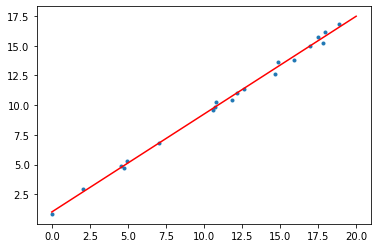

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(points_2d["X"], points_2d["Y"], marker=".")
x = np.linspace(0,20,100)
y = m*x + b
plt.plot(x, y, label="our line", color='red')